In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5405,4097-YODCF,Male,0,No,Yes,34,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Electronic check,103.80,3470.8,No
3180,6734-CKRSM,Female,0,No,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.00,63.6,No
1526,2984-AFWNC,Female,0,No,No,3,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,95.40,293.15,No
2950,3345-JHUEO,Male,0,No,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,20.20,55.7,No
3322,8058-JMEQO,Female,1,No,No,9,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.45,762.5,Yes


In [17]:
df.drop(['customerID'], axis=1, inplace=True)

In [18]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [19]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [20]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [21]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [22]:
df.shape

(7043, 20)

In [23]:
df.iloc[488].TotalCharges

' '

In [24]:
df1 = df[df['TotalCharges']!= ' ' ]

In [25]:
df1.shape

(7032, 20)

In [26]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/home/krishna/anaconda3/envs/tf/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [27]:
df1.TotalCharges.dtypes

dtype('float64')

In [28]:
df1.tenure.values

array([ 1, 34,  2, ..., 11,  4, 66])

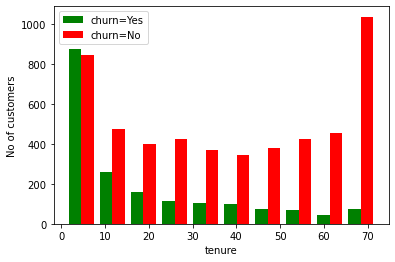

In [29]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('No of customers')
plt.hist([tenure_churn_yes, tenure_churn_no] , color=['green', 'red'], label=['churn=Yes', 'churn=No'])
plt.legend()

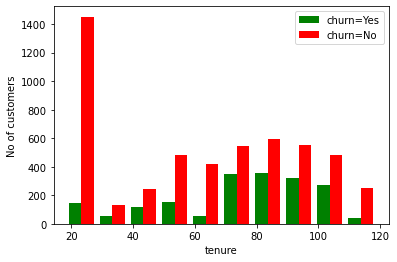

In [30]:
tenure_churn_no = df1[df1.Churn=='No'].MonthlyCharges
tenure_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel('tenure')
plt.ylabel('No of customers')
plt.hist([tenure_churn_yes, tenure_churn_no] , color=['green', 'red'], label=['churn=Yes', 'churn=No'])
plt.legend()

In [31]:
for column in df1.columns:
    print(column ,'--> ', df1[column].unique())

gender -->  ['Female' 'Male']
SeniorCitizen -->  [0 1]
Partner -->  ['Yes' 'No']
Dependents -->  ['No' 'Yes']
tenure -->  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService -->  ['No' 'Yes']
MultipleLines -->  ['No phone service' 'No' 'Yes']
InternetService -->  ['DSL' 'Fiber optic' 'No']
OnlineSecurity -->  ['No' 'Yes' 'No internet service']
OnlineBackup -->  ['Yes' 'No' 'No internet service']
DeviceProtection -->  ['No' 'Yes' 'No internet service']
TechSupport -->  ['No' 'Yes' 'No internet service']
StreamingTV -->  ['No' 'Yes' 'No internet service']
StreamingMovies -->  ['No' 'Yes' 'No internet service']
Contract -->  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -->  ['Yes' 'No']
PaymentMethod -->  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Mon

In [32]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

/home/krishna/anaconda3/envs/tf/lib/python3.7/site-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [33]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for cols in yes_no_columns:
    df1[cols].replace({'Yes':0, 'No':1}, inplace=True)

/home/krishna/anaconda3/envs/tf/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [34]:
for col in df1:
    print(col , '---->' ,df1[col].unique())

gender ----> ['Female' 'Male']
SeniorCitizen ----> [0 1]
Partner ----> [0 1]
Dependents ----> [1 0]
tenure ----> [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService ----> [1 0]
MultipleLines ----> [1 0]
InternetService ----> ['DSL' 'Fiber optic' 'No']
OnlineSecurity ----> [1 0]
OnlineBackup ----> [0 1]
DeviceProtection ----> [1 0]
TechSupport ----> [1 0]
StreamingTV ----> [1 0]
StreamingMovies ----> [1 0]
Contract ----> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ----> [0 1]
PaymentMethod ----> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges ----> [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges ----> [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn ----> [1 0]


In [35]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [36]:
df1.gender.unique()

array([1, 0])

In [37]:
pd.get_dummies(df1.InternetService)

,DSL,Fiber optic,No
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
7038,1,0,0
7039,0,1,0
7040,1,0,0
7041,0,1,0


In [38]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [39]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [40]:
df2.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,1,1,1,1,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0,0,1,1,34,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,1,1,2,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,1,1,45,1,1,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,1,1,2,0,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0


In [41]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [59]:
df2[cols_to_scale].head()

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330


In [42]:
for col in df2:
    print(f'{col} - {df2[col].unique()}')

gender - [1 0]
SeniorCitizen - [0 1]
Partner - [0 1]
Dependents - [1 0]
tenure - [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService - [1 0]
MultipleLines - [1 0]
OnlineSecurity - [1 0]
OnlineBackup - [0 1]
DeviceProtection - [1 0]
Tech

In [43]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [44]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: Churn, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)



In [46]:
X_train.shape

(5625, 26)

In [47]:
X_test.shape

(1407, 26)

In [48]:
len(X_train.columns)

26

In [49]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26, ), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

2021-10-24 07:52:02.930968: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [50]:
model.fit(X_train, y_train, epochs=100)

2021-10-24 07:52:03.975999: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-24 07:52:04.083265: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2394655000 Hz


Epoch 1/100
176/176 [==============================] - 2s 2ms/step - loss: 0.5704 - accuracy: 0.7075
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.7914
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4250 - accuracy: 0.8001
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4326 - accuracy: 0.7919
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8048
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4140 - accuracy: 0.8043
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8072
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4117 - accuracy: 0.8042
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.8127
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4119 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.3950 - accuracy: 0.8130
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3788 - accuracy: 0.8169
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 0.8153
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8168
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.8135
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3904 - accuracy: 0.8112
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3972 - accuracy: 0.8127
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3897 - accuracy: 0.8202
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3880 - accuracy: 0.8178
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3859 - accuracy: 

In [51]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4427 - accuracy: 0.7832


[0.4426705539226532, 0.783226728439331]

In [52]:
y_p = model.predict(X_test)

In [53]:
y_test

2660    1
744     1
5579    0
64      0
3287    0
       ..
2024    1
4396    0
4081    0
1297    1
4899    0
Name: Churn, Length: 1407, dtype: int64

In [54]:
y_preddict = []

for elem in y_p:
    if elem > 0.5:
        y_preddict.append(1)
    else:
        y_preddict.append(0)

In [55]:
y_preddict[:10]

[1, 0, 1, 0, 0, 0, 1, 0, 1, 1]

In [56]:
y_test[:10]

2660    1
744     1
5579    0
64      0
3287    0
816     0
2670    1
5920    1
1023    1
6087    1
Name: Churn, dtype: int64

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(classification_report(y_test, y_preddict))

              precision    recall  f1-score   support

           0       0.65      0.55      0.59       408
           1       0.83      0.88      0.85       999

    accuracy                           0.78      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.78      0.78      1407



Text(69.0, 0.5, 'Truth')

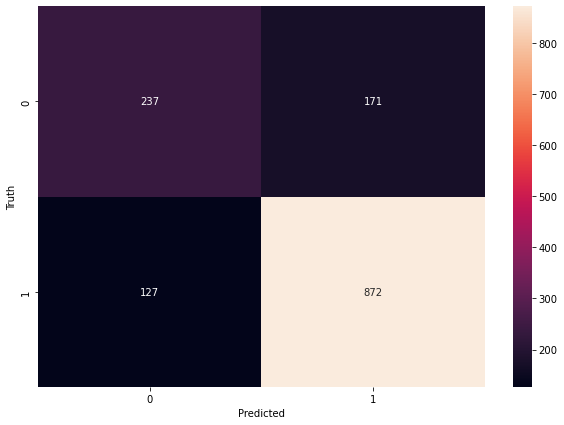

In [101]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_preddict)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [58]:
accuracy = accuracy_score(y_test, y_preddict)
accuracy

0.783226723525231

In [60]:
from tensorflow_addons import losses

In [61]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [62]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [63]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.6087 - accuracy: 0.6741
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.7959
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8126
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4229 - accuracy: 0.7930
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4064 - accuracy: 0.8129
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8116
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4045 - accuracy: 0.8107
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4077 - accuracy: 0.8120
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8051
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4152 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.3448 - accuracy: 0.8383
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3711 - accuracy: 0.8266
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3563 - accuracy: 0.8335
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3507 - accuracy: 0.8385
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3573 - accuracy: 0.8333
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3635 - accuracy: 0.8357
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3625 - accuracy: 0.8289
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3712 - accuracy: 0.8338
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3477 - accuracy: 0.8388
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3553 - accuracy: 

In [64]:
y_train.value_counts()

1    4164
0    1461
Name: Churn, dtype: int64

<h3>Under sampling </h3>

In [80]:
# Class count
count_class_1, count_class_0 = df2.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [81]:
df2.Churn.value_counts()

1    5163
0    1869
Name: Churn, dtype: int64

In [82]:
count_class_0, count_class_1

(1869, 5163)

In [83]:
df_class_1.shape, df_class_0.shape

((5163, 27), (1869, 27))

In [69]:
df_class_1.sample(count_class_0).shape

(5163, 27)

In [86]:
# Undersample 0-class and concat the DataFrames of both class
df_class_1_under = df_class_1.sample(count_class_0)
df_test_under = pd.concat([df_class_0, df_class_1_under], axis=0)

In [89]:
df_test_under.Churn.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [90]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [91]:
# Number of classes in training Data
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [92]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6695 - accuracy: 0.5777
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5325 - accuracy: 0.7385
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5030 - accuracy: 0.7576
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4733 - accuracy: 0.7685
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4883 - accuracy: 0.7559
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4815 - accuracy: 0.7703
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4859 - accuracy: 0.7627
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4863 - accuracy: 0.7652
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4835 - accuracy: 0.7633
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7621
Epoch 11/

94/94 [==============================] - 0s 4ms/step - loss: 0.4054 - accuracy: 0.8097
Epoch 84/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4173 - accuracy: 0.8037
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4266 - accuracy: 0.8037
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4136 - accuracy: 0.8071
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4246 - accuracy: 0.8052
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3949 - accuracy: 0.8139
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8117
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8079
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4005 - accuracy: 0.8100
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8049
Epoch 93/100


### Method2: Oversampling

In [93]:
count_class_0, count_class_1

(1869, 5163)

In [96]:
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
df_test_over = pd.concat([df_class_0_over, df_class_1], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [97]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [98]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [99]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.6602 - accuracy: 0.6050
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.5011 - accuracy: 0.7480
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4959 - accuracy: 0.7594
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.7728
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.7612
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.7695
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4811 - accuracy: 0.7604
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4677 - accuracy: 0.7740
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4665 - accuracy: 0.7774
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4633 - accura

259/259 [==============================] - 0s 2ms/step - loss: 0.3633 - accuracy: 0.8341
Epoch 82/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3787 - accuracy: 0.8278
Epoch 83/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.8283
Epoch 84/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3737 - accuracy: 0.8336
Epoch 85/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3664 - accuracy: 0.8369
Epoch 86/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3632 - accuracy: 0.8333
Epoch 87/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3795 - accuracy: 0.8290
Epoch 88/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3699 - accuracy: 0.8276
Epoch 89/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3735 - accuracy: 0.8310
Epoch 90/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3779 - accuracy: 


### Method3: SMOTE
To install imbalanced-learn library use pip install imbalanced-learn command

In [100]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [102]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [104]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [105]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5875 - accuracy: 0.6746
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4808 - accuracy: 0.7652
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4702 - accuracy: 0.7647
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4591 - accuracy: 0.7726
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4562 - accuracy: 0.7806
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4454 - accuracy: 0.7850
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4420 - accuracy: 0.7826
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4297 - accuracy: 0.7908
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4412 - accuracy: 0.7860
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4376 - accura

259/259 [==============================] - 0s 2ms/step - loss: 0.3615 - accuracy: 0.8396
Epoch 82/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3581 - accuracy: 0.8451
Epoch 83/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3654 - accuracy: 0.8314
Epoch 84/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3669 - accuracy: 0.8363
Epoch 85/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3563 - accuracy: 0.8406
Epoch 86/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3493 - accuracy: 0.8472
Epoch 87/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3507 - accuracy: 0.8421
Epoch 88/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3557 - accuracy: 0.8420
Epoch 89/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3584 - accuracy: 0.8399
Epoch 90/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3544 - accuracy: 

### Method4: Use of Ensemble with undersampling

In [106]:
df2.Churn.value_counts()

1    5163
0    1869
Name: Churn, dtype: int64

In [107]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [109]:
y_train.value_counts()

1    4130
0    1495
Name: Churn, dtype: int64

In [110]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [111]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
2660,0,0,1,0,0.169014,0,1,0,1,1,...,0,0,1,0,0,0,1,0,0,1
2141,0,0,0,0,0.211268,0,1,1,1,1,...,0,1,1,0,0,0,0,1,0,1
669,1,0,0,1,0.971831,1,1,1,0,0,...,0,0,0,0,1,1,0,0,0,1
2615,1,0,1,1,1.000000,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
151,0,0,1,1,0.084507,0,0,1,1,1,...,1,0,1,0,0,0,0,0,1,0


In [113]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [117]:
df3_class0.shape, df3_class1.shape

((1495, 27), (4130, 27))

In [115]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train

In [118]:
X_train, y_train = get_train_batch(df3_class1, df3_class0, 0, 1495)

In [119]:
y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6811 - accuracy: 0.5581
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5379 - accuracy: 0.7546
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4985 - accuracy: 0.7589
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4926 - accuracy: 0.7584
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.7808
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.7679
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.7743
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4810 - accuracy: 0.7665
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.7707
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.7767
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.3918 - accuracy: 0.8192
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.8041
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4221 - accuracy: 0.7918
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.7953
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4096 - accuracy: 0.7913
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4076 - accuracy: 0.7984
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4037 - accuracy: 0.8052
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3859 - accuracy: 0.8094
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3862 - accuracy: 0.8118
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3853 - accuracy: 0.8286
Epoch 93/100


In [120]:
X_train, y_train = get_train_batch(df3_class1, df3_class0, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6047 - accuracy: 0.7039
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5089 - accuracy: 0.7514
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4862 - accuracy: 0.7607
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5004 - accuracy: 0.7504
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4803 - accuracy: 0.7574
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4916 - accuracy: 0.7594
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4719 - accuracy: 0.7710
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4719 - accuracy: 0.7721
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.7729
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4521 - accuracy: 0.7797
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.3845 - accuracy: 0.8183
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3791 - accuracy: 0.8267
Epoch 85/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3944 - accuracy: 0.8139
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4006 - accuracy: 0.8155
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3962 - accuracy: 0.8199
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3914 - accuracy: 0.8259
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3887 - accuracy: 0.8211
Epoch 90/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3878 - accuracy: 0.8253
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3882 - accuracy: 0.8207
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3824 - accuracy: 0.8163
Epoch 93/100


In [121]:
X_train, y_train = get_train_batch(df3_class1, df3_class0, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.6453 - accuracy: 0.6292
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5077 - accuracy: 0.7668
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4841 - accuracy: 0.7642
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.7611
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4712 - accuracy: 0.7734
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4472 - accuracy: 0.7880
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4867 - accuracy: 0.7577
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4639 - accuracy: 0.7783
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4740 - accuracy: 0.7694
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4578 - accuracy: 0.7802
Epoch 11/

83/83 [==============================] - 0s 2ms/step - loss: 0.3828 - accuracy: 0.8314
Epoch 84/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8219
Epoch 85/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4036 - accuracy: 0.8189
Epoch 86/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3671 - accuracy: 0.8343
Epoch 87/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.8203
Epoch 88/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3821 - accuracy: 0.8218
Epoch 89/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3693 - accuracy: 0.8334
Epoch 90/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3749 - accuracy: 0.8223
Epoch 91/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3688 - accuracy: 0.8390
Epoch 92/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3673 - accuracy: 0.8301
Epoch 93/100


In [122]:
len(y_pred1)

1407

In [123]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [124]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.50      0.82      0.62       374
           1       0.91      0.71      0.80      1033

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.81      0.74      0.75      1407

